In [1]:
from IPython.core.display import display_html
from urllib.request import urlopen

display_html(urlopen('http://bit.ly/1HflmO9').read(), raw=True)

# Ejercicio

## Manipulador PUMA

In [62]:
from sympy import var, sin, cos, Matrix, Integer, eye, Function, Rational, exp, Symbol, I, solve, pi, trigsimp, MatrixSymbol
from sympy.physics.mechanics import mechanics_printing
mechanics_printing()

In [3]:
var("q:4")

In [4]:
var("l:4")

In [22]:
lc1 = Symbol("l_{c_1}")
lc2 = Symbol("l_{c_2}")
lc3 = Symbol("l_{c_3}")

In [5]:
def denavit_hartenberg_general(a, d, α, θ, mat, sin, cos):
    Ai = mat([[cos(θ), -sin(θ)*cos(α), sin(θ)*sin(α), a*cos(θ)],
              [sin(θ), cos(θ)*cos(α), -cos(θ)*sin(α), a*sin(θ)],
              [0, sin(α), cos(α), d],
              [0, 0, 0, 1]])
    return Ai

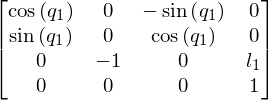

In [23]:
A1 = denavit_hartenberg_general(0, l1, -pi/2, q1, Matrix, sin, cos)
Ac1 = denavit_hartenberg_general(0, lc1, -pi/2, q1, Matrix, sin, cos)
A1

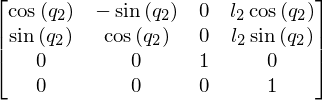

In [24]:
A2 = denavit_hartenberg_general(l2, 0, 0, q2, Matrix, sin, cos)
Ac2 = denavit_hartenberg_general(lc2, 0, 0, q2, Matrix, sin, cos)
A2

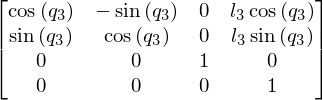

In [25]:
A3 = denavit_hartenberg_general(l3, 0, 0, q3, Matrix, sin, cos)
Ac3 = denavit_hartenberg_general(lc3, 0, 0, q3, Matrix, sin, cos)
A3

In [9]:
T01 = A1
T02 = T01*A2
T03 = trigsimp(T02*A3)

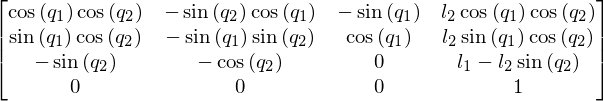

In [10]:
T02

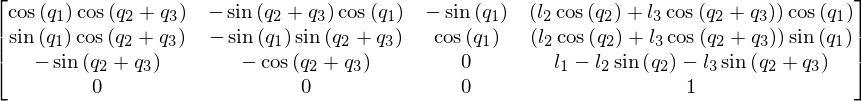

In [11]:
T03

In [12]:
o0 = Matrix([[0], [0], [0]])
o1 = T01[:3, 3]
o2 = T02[:3, 3]
o3 = T03[:3, 3]

In [13]:
o1

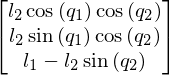

In [14]:
o2

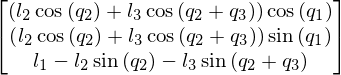

In [15]:
o3

In [16]:
z0 = Matrix([[0], [0], [1]])
z1 = T01[:3, 2]
z2 = T02[:3, 2]

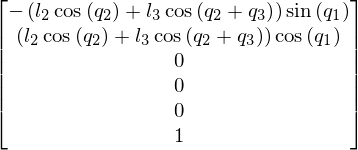

In [17]:
J1 = z0.cross(o3 - o0).col_join(z0)
J1

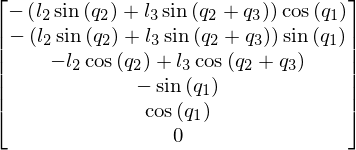

In [18]:
J2 = trigsimp(z1.cross(o3 - o1)).col_join(z1)
J2

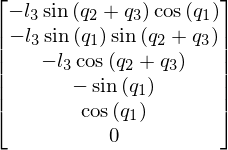

In [19]:
J3 = trigsimp(z2.cross(o3 - o2)).col_join(z2)
J3

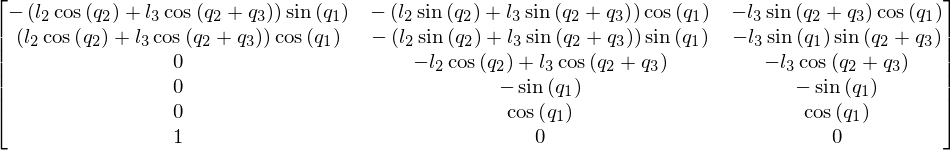

In [20]:
Jg = (J1.row_join(J2)).row_join(J3)
Jg

In [30]:
T0c1 = Ac1
T0c2 = A1*Ac2
T0c3 = trigsimp(A1*A2*Ac3)

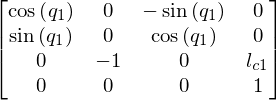

In [31]:
T0c1

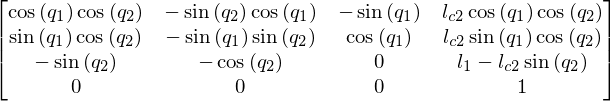

In [32]:
T0c2

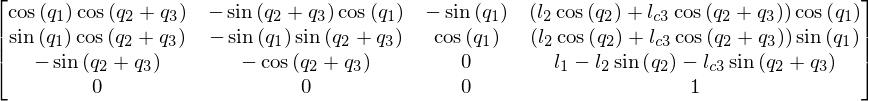

In [33]:
T0c3

In [34]:
c1 = T0c1[:3, 3]
c2 = T0c2[:3, 3]
c3 = T0c3[:3, 3]

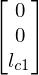

In [35]:
c1

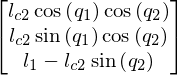

In [36]:
c2

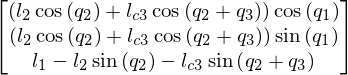

In [37]:
c3

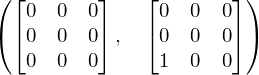

In [49]:
Jv1 = ((z0.cross(c1 - o0)).row_join(o0)).row_join(o0)
Jω1 = (z0.row_join(o0)).row_join(o0)
Jv1, Jω1

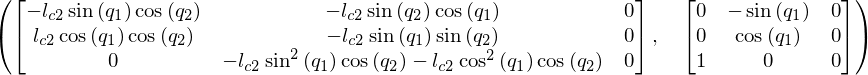

In [50]:
Jv2 = (z0.cross(c2 - o0).row_join(z1.cross(c2 - o1))).row_join(o0)
Jω2 = (z0.row_join(z1)).row_join(o0)
Jv2, Jω2

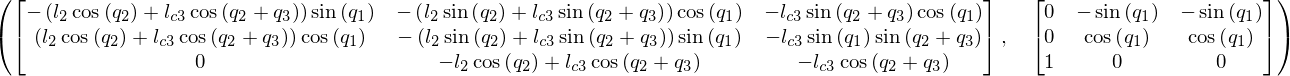

In [51]:
Jv3 = trigsimp((z0.cross(c3 - o0).row_join(z1.cross(c3 - o1))).row_join(z2.cross(c3 - o2)))
Jω3 = (z0.row_join(z1)).row_join(z2)
Jv3, Jω3

In [52]:
var("m:4")

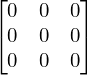

In [53]:
m1*Jv1.T*Jv1

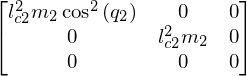

In [57]:
trigsimp(m2*Jv2.T*Jv2)

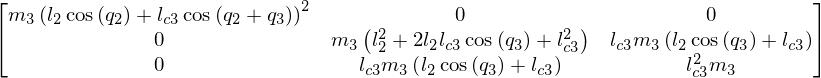

In [59]:
trigsimp(m3*Jv3.T*Jv3)

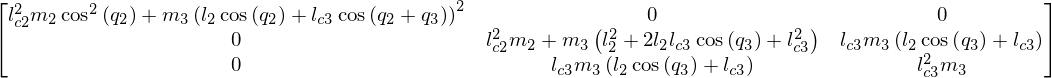

In [83]:
Kt = m1*Jv1.T*Jv1 + trigsimp(m2*Jv2.T*Jv2) + trigsimp(m3*Jv3.T*Jv3)
Kt

In [77]:
var("Ix1 Iy1 Iz1 Ix2 Iy2 Iz2 Ix3 Iy3 Iz3")

In [80]:
I1 = Matrix([[Ix1, 0, 0],[0, Iy1, 0],[0, 0, Iz1]])
I2 = Matrix([[Ix2, 0, 0],[0, Iy2, 0],[0, 0, Iz2]])
I3 = Matrix([[Ix3, 0, 0],[0, Iy3, 0],[0, 0, Iz3]])

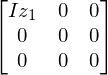

In [79]:
Jω1.T*I1*Jω2

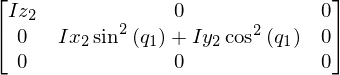

In [81]:
trigsimp(Jω2.T*I2*Jω2)

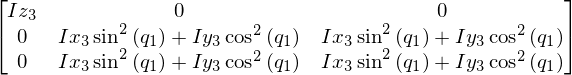

In [82]:
trigsimp(Jω3.T*I3*Jω3)

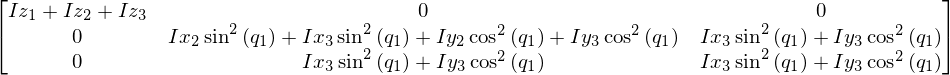

In [84]:
Kr = Jω1.T*I1*Jω2 + trigsimp(Jω2.T*I2*Jω2) + trigsimp(Jω3.T*I3*Jω3)
Kr

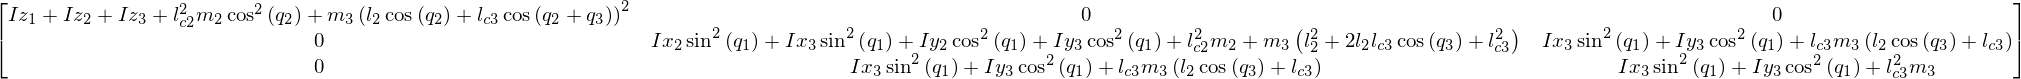

In [85]:
Kt + Kr

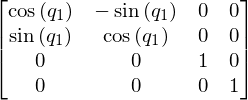

In [90]:
B1 = denavit_hartenberg_general(0, 0, 0, q1, Matrix, sin, cos)
B1

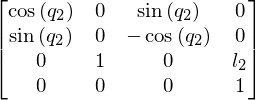

In [91]:
B2 = denavit_hartenberg_general(0, l2, pi/2, q2, Matrix, sin, cos)
B2

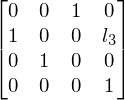

In [92]:
B3 = denavit_hartenberg_general(l3, 0, pi/2, pi/2, Matrix, sin, cos)
B3

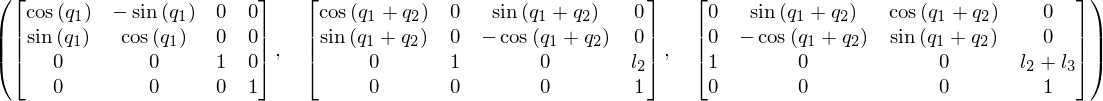

In [96]:
T01 = B1
T02 = trigsimp(B1*B2)
T03 = trigsimp(B1*B2*B3)
T01, T02, T03